In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
path_dir = "C:/Users/dwku/Downloads/data"

In [5]:
file_list = os.listdir(path_dir)
file_list.sort
len(file_list)
file_list

['192.168.1.200_20181205.txt',
 '192.168.1.200_20181206.txt',
 '192.168.1.200_20181207.txt']

In [6]:
column_name=['time', 'value', 'date']

In [7]:
for i in range(len(file_list)):
    file_dir = path_dir + "/" + file_list[i]    
    df_buff = pd.read_csv(file_dir, sep="\t", header=None)
    df_buff[2] = file_list[i][14:22]
    if i == 0:
        df_raw = df_buff
    else:
        df_raw = pd.concat([df_raw, df_buff])

df0 = df_raw
df0.columns = column_name
df0.head()

,time,value,date
0,13:14:48,"[175, 445, 7469, 2372, 380, 966, 898, 706, 122...",20181205
1,13:14:49,"[74, 188, 7453, 2363, 74, 188, 121, 173, 97, 9...",20181205
2,13:14:50,"[74, 188, 7457, 2365, 74, 188, 121, 173, 97, 9...",20181205
3,13:14:51,"[51, 130, 7477, 2376, 92, 235, 98, 136, 122, 9...",20181205
4,13:14:52,"[51, 130, 7477, 2376, 92, 235, 98, 136, 122, 9...",20181205


In [8]:
df_val = df0["value"].str.split("[", n = 0, expand = True) 
df_val = df_val[1].str.split(", ", expand=True)
df_val.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,175,445,7469,2372,380,966,898,706,122,97,...,170,432,62,0,0,0,0,0,0,0]
1,74,188,7453,2363,74,188,121,173,97,97,...,170,432,62,0,0,0,0,0,0,0]
2,74,188,7457,2365,74,188,121,173,97,97,...,170,432,62,0,0,0,0,0,0,0]
3,51,130,7477,2376,92,235,98,136,122,97,...,68,172,11,0,0,0,0,0,0,0]
4,51,130,7477,2376,92,235,98,136,122,97,...,68,172,11,0,0,0,0,0,0,0]


In [9]:
col_name = ["date", "time", "Z_Axis_RMS_Velocity(in/s)", "Z_Axis_RMS_Velocity(mm/s)", "Temperature(F)",
            "Temperature(C)" ,"X_Axis_RMS_Velocity(in/s)", "X_Axis_RMS_Velocity(mm/s)", 
            "Z_Axis_Peak_Acceleration(G)", "X_Axis_Peak_Acceleration(G)", 
            "Z_Axis_Peak_Frequency(Hz)", "X_Axis_Peak_Frequency(Hz)", "Z_Axis_RMS_Acceleration(G)",
            "X_Axis_RMS_Acceleration(G)", "Z_Axis_Kurtosis", "X_Axis_Kurtosis", "Z_Axis_Crest_Acceleration", 
            "X_Axis_Crest_Acceleration", "Z_Axis_Peak_Velocity(in/s)", "Z_Axis_Peak_Velocity(mm/s)", 
            "X_Axis_Peak_Velocity(in/s)", "X_Axis_Peak_Velocity(mm/s)", "Z_Axis_High-Frequency_RMS_Acceleration(G)"]
len(col_name)

23

In [10]:
df_sen1 = pd.concat([df0["date"], df0["time"], df_val.iloc[:,:21]], axis=1, sort=False)
df_sen1.columns = col_name
df_sen1 = df_sen1.assign(node=1)

df_sen2 = pd.concat([df0["date"], df0["time"], df_val.iloc[:,21:42]], axis=1, sort=False)
df_sen2.columns = col_name
df_sen2 = df_sen2.assign(node=2)

df_sen3 = pd.concat([df0["date"], df0["time"], df_val.iloc[:,42:63]], axis=1, sort=False)
df_sen3.columns = col_name
df_sen3 = df_sen3.assign(node=3)


1    1
1    1
1    1
Name: series, dtype: int64

In [11]:
# df_sen1["series"] = df_sen1.index.values
# df_sen1["series"][1]
# sns.lineplot(x="series", y=col_name[7], data=df_sen1)

In [12]:
col_name

['date',
 'time',
 'Z_Axis_RMS_Velocity(in/s)',
 'Z_Axis_RMS_Velocity(mm/s)',
 'Temperature(F)',
 'Temperature(C)',
 'X_Axis_RMS_Velocity(in/s)',
 'X_Axis_RMS_Velocity(mm/s)',
 'Z_Axis_Peak_Acceleration(G)',
 'X_Axis_Peak_Acceleration(G)',
 'Z_Axis_Peak_Frequency(Hz)',
 'X_Axis_Peak_Frequency(Hz)',
 'Z_Axis_RMS_Acceleration(G)',
 'X_Axis_RMS_Acceleration(G)',
 'Z_Axis_Kurtosis',
 'X_Axis_Kurtosis',
 'Z_Axis_Crest_Acceleration',
 'X_Axis_Crest_Acceleration',
 'Z_Axis_Peak_Velocity(in/s)',
 'Z_Axis_Peak_Velocity(mm/s)',
 'X_Axis_Peak_Velocity(in/s)',
 'X_Axis_Peak_Velocity(mm/s)',
 'Z_Axis_High-Frequency_RMS_Acceleration(G)']

In [33]:
frames = [df_sen1, df_sen2, df_sen3]
frames = [df_sen3]
df = pd.concat(frames).sort_values(by=['date', 'time'])
df.reset_index()
df["time_series"] = df.index.values

# # String to Float Transformation
for i in range(2, len(col_name)):
    df[col_name[i]] = pd.to_numeric(df[col_name[i]])
    

df["Z_Axis_RMS_Velocity(mm/s)"] = df["Z_Axis_RMS_Velocity(mm/s)"]/1000    
df["X_Axis_RMS_Velocity(mm/s)"] = df["X_Axis_RMS_Velocity(mm/s)"]/1000    
df["Temperature(C)"] = df["Temperature(C)"]/100
df["Z_Axis_Peak_Acceleration(G)"] = df["Z_Axis_Peak_Acceleration(G)"]/1000
df["X_Axis_Peak_Acceleration(G)"] = df["X_Axis_Peak_Acceleration(G)"]/1000
df["Z_Axis_Kurtosis"] = df["Z_Axis_Kurtosis"]/1000
df["X_Axis_Kurtosis"] = df["X_Axis_Kurtosis"]/1000

df.head()

,date,time,Z_Axis_RMS_Velocity(in/s),Z_Axis_RMS_Velocity(mm/s),Temperature(F),Temperature(C),X_Axis_RMS_Velocity(in/s),X_Axis_RMS_Velocity(mm/s),Z_Axis_Peak_Acceleration(G),X_Axis_Peak_Acceleration(G),...,X_Axis_Kurtosis,Z_Axis_Crest_Acceleration,X_Axis_Crest_Acceleration,Z_Axis_Peak_Velocity(in/s),Z_Axis_Peak_Velocity(mm/s),X_Axis_Peak_Velocity(in/s),X_Axis_Peak_Velocity(mm/s),Z_Axis_High-Frequency_RMS_Acceleration(G),node,time_series
0,20181205,13:14:48,237,0.604,7531,24.06,120,0.305,0.227,0.225,...,3.200,3629,4294,336,854,170,432,62,3,0
1,20181205,13:14:49,237,0.604,7527,24.04,120,0.305,0.227,0.225,...,3.200,3629,4294,336,854,170,432,62,3,1
2,20181205,13:14:50,237,0.604,7527,24.04,120,0.305,0.227,0.225,...,3.200,3629,4294,336,854,170,432,62,3,2
3,20181205,13:14:51,57,0.147,7527,24.04,48,0.122,0.056,0.078,...,4.738,4743,6069,81,208,68,172,11,3,3
4,20181205,13:14:52,57,0.147,7527,24.04,48,0.122,0.056,0.078,...,4.738,4743,6069,81,208,68,172,11,3,4


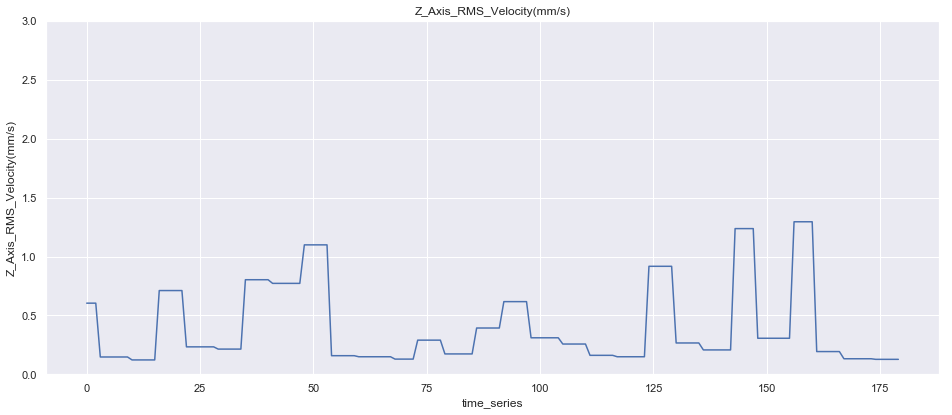

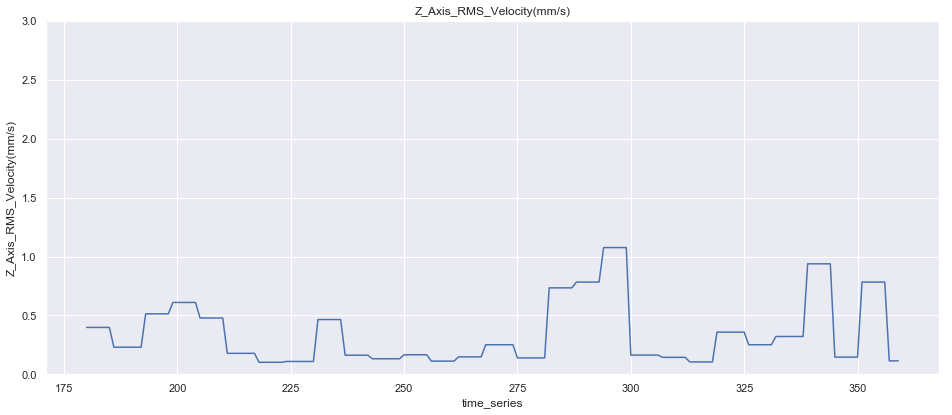

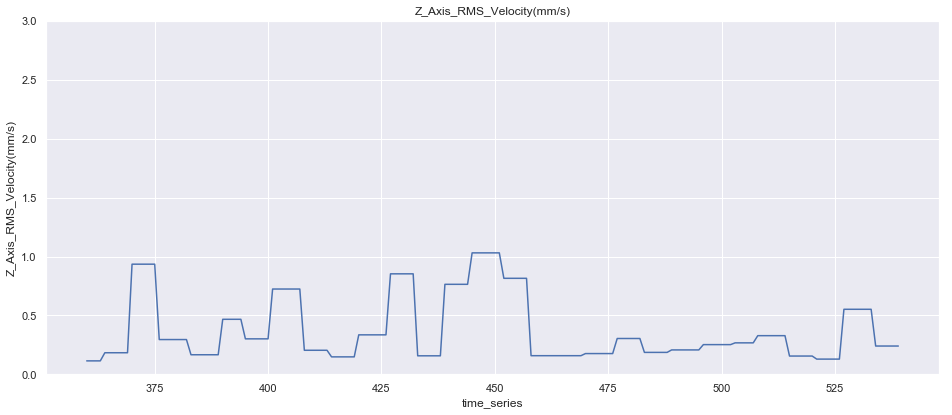

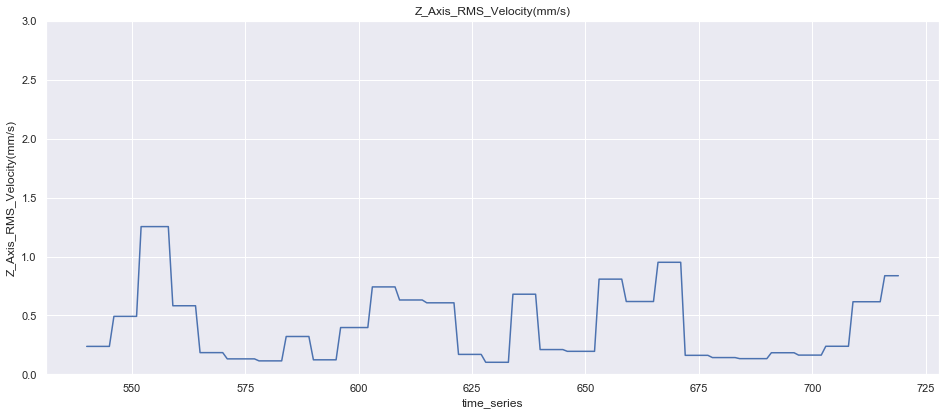

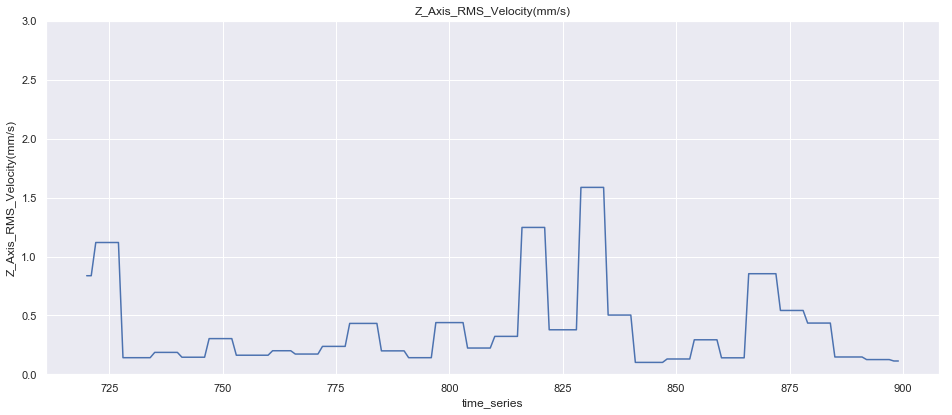

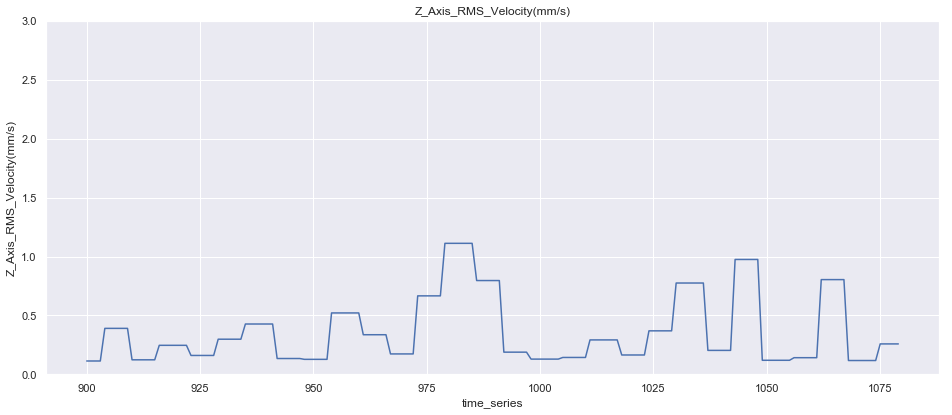

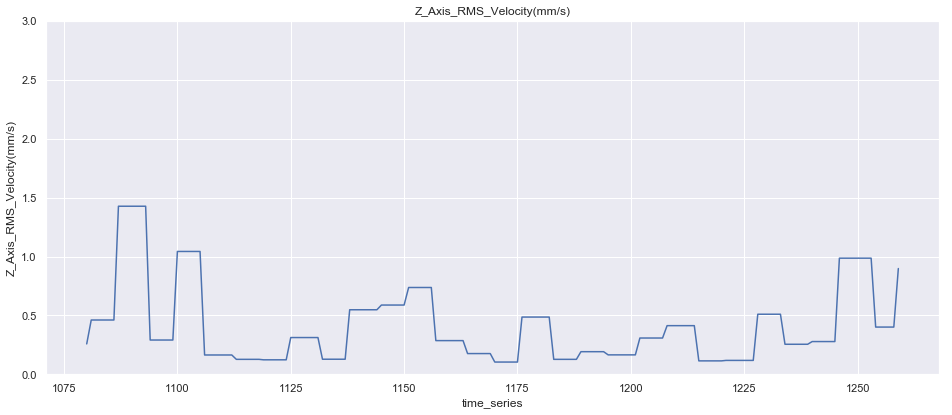

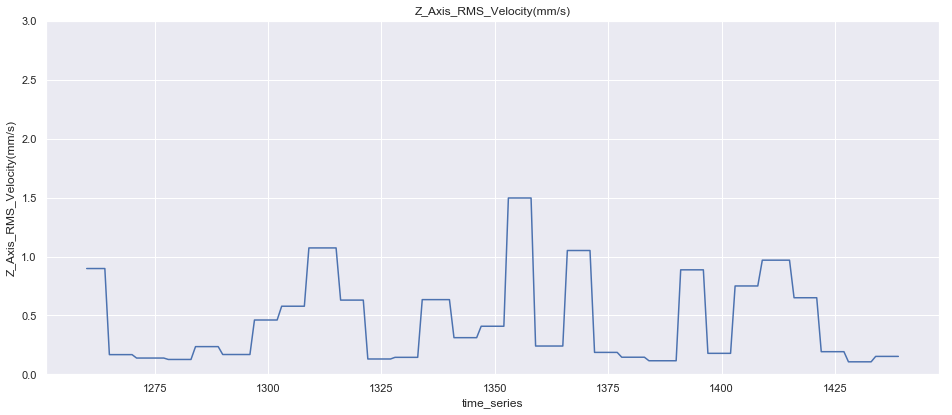

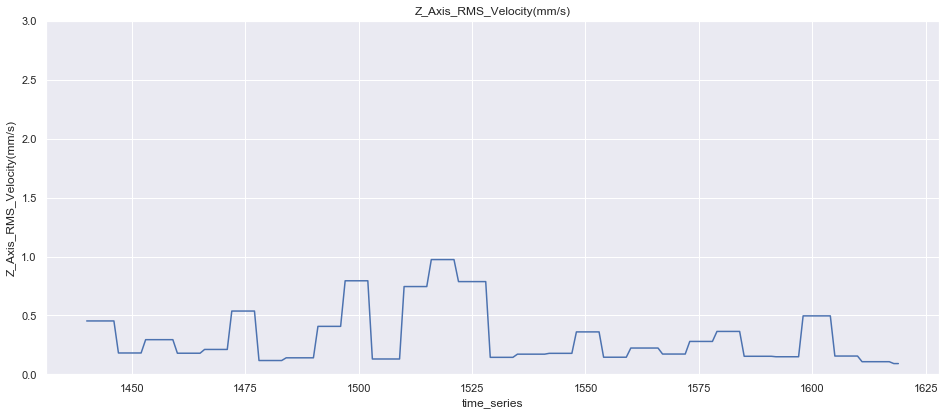

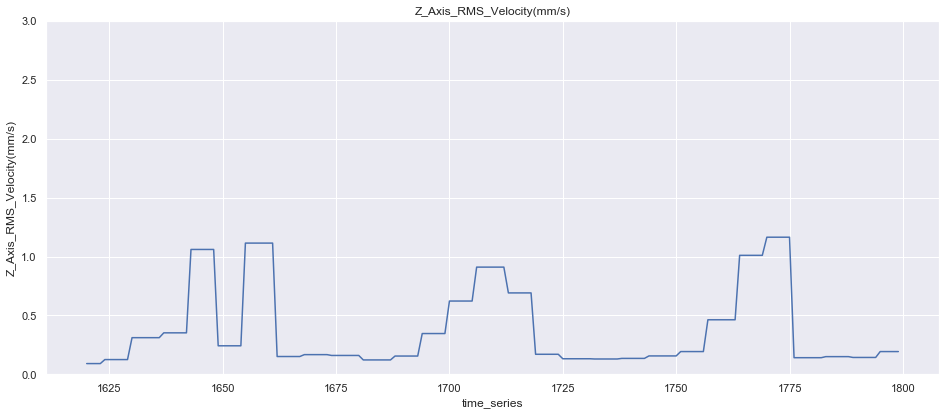

In [34]:
sns.set(style="darkgrid")
palette = sns.color_palette("mako_r", 3)

for i in range(10):
    f, ax = plt.subplots(figsize=(16, 6.5))
    start = i*180
    end = (i+1)*180        
    g = sns.lineplot(x="time_series", y=col_name[3],
                      palette=palette,
                     data=df[start:end],
                     ax = ax)
    g.set(ylim=(0, 3))
    
    plt.title(col_name[3])

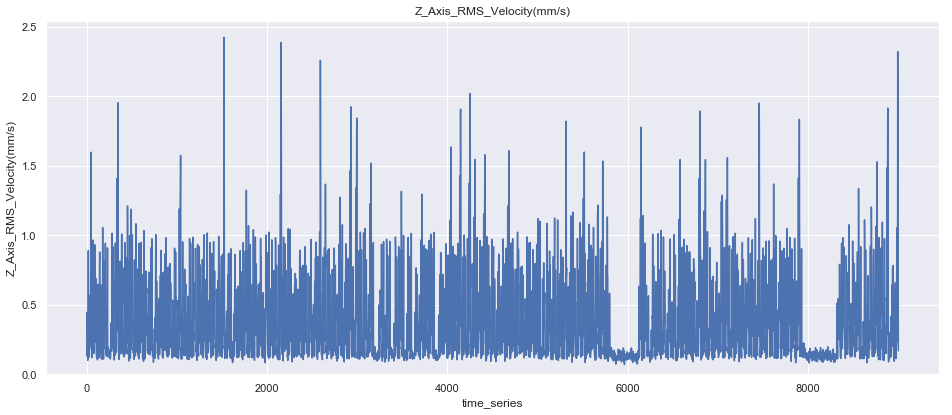

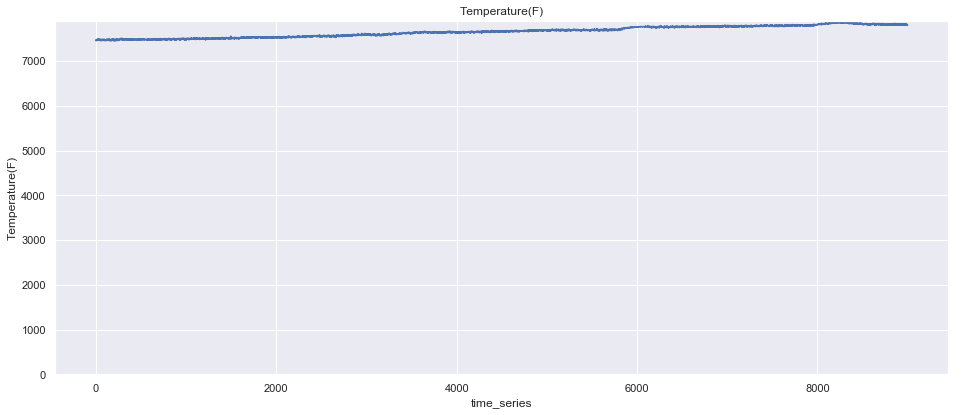

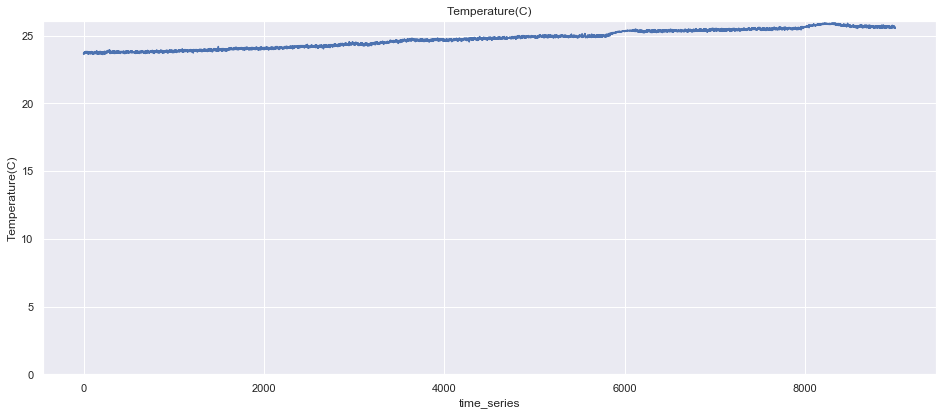

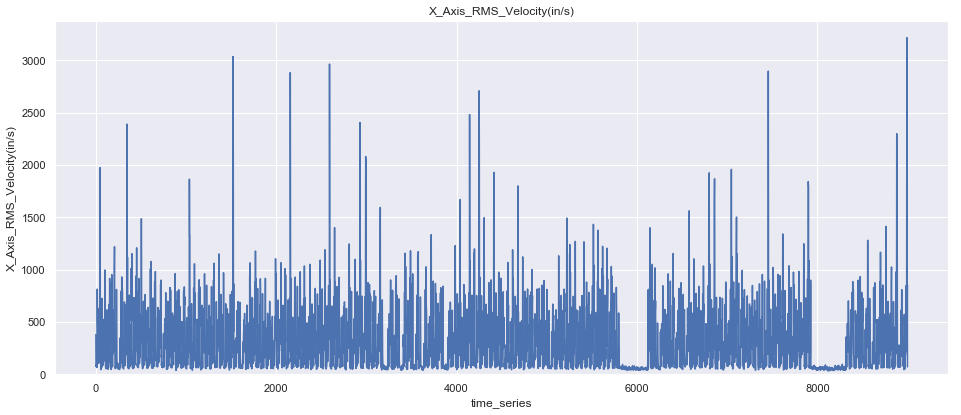

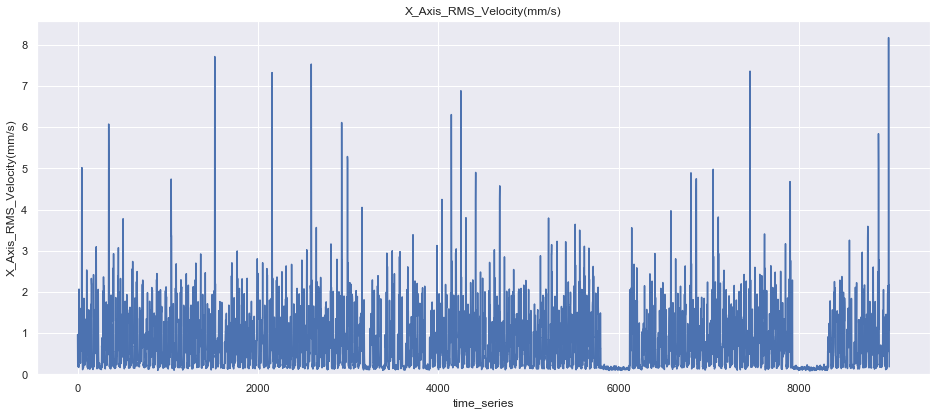

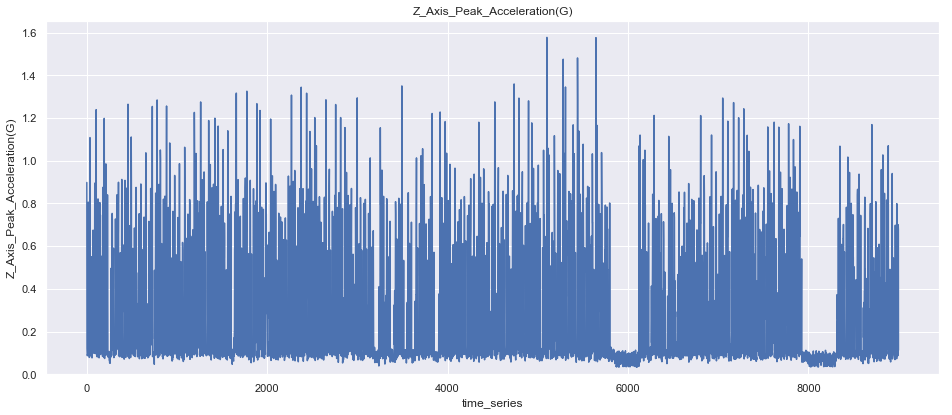

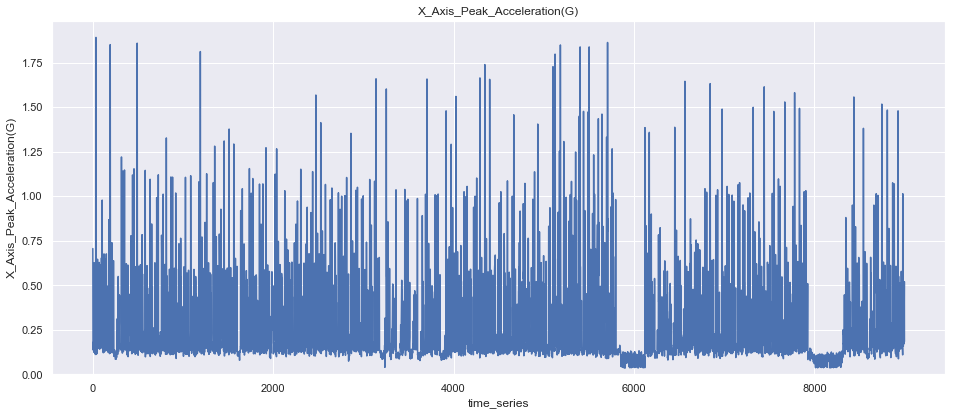

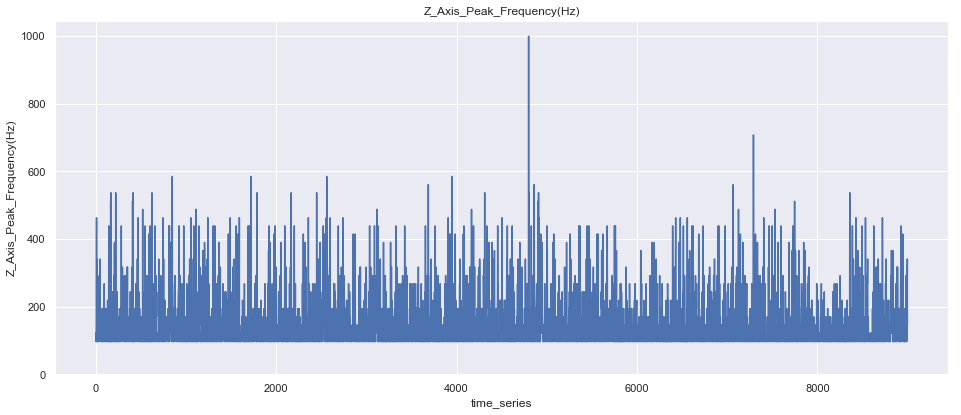

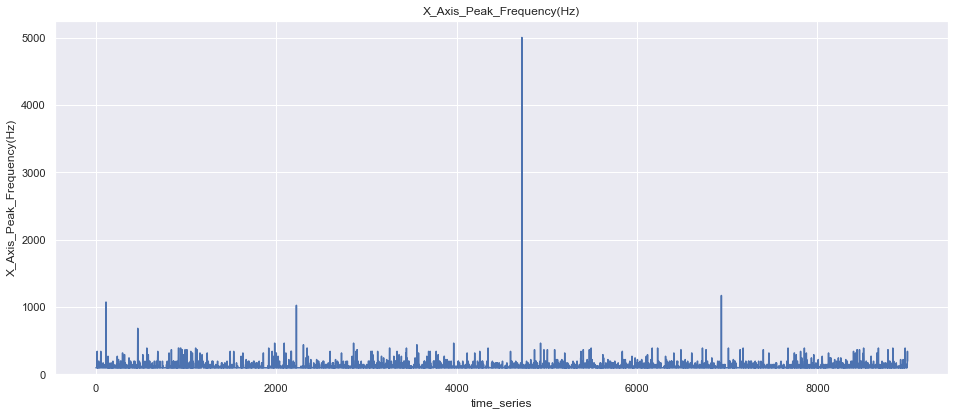

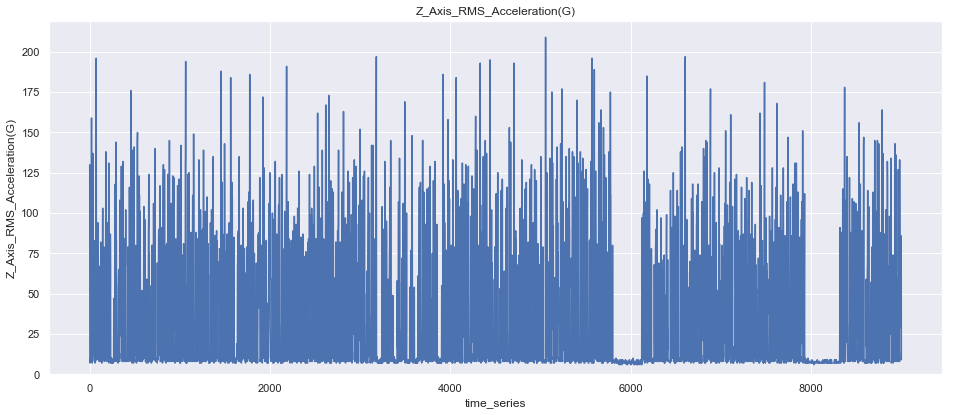

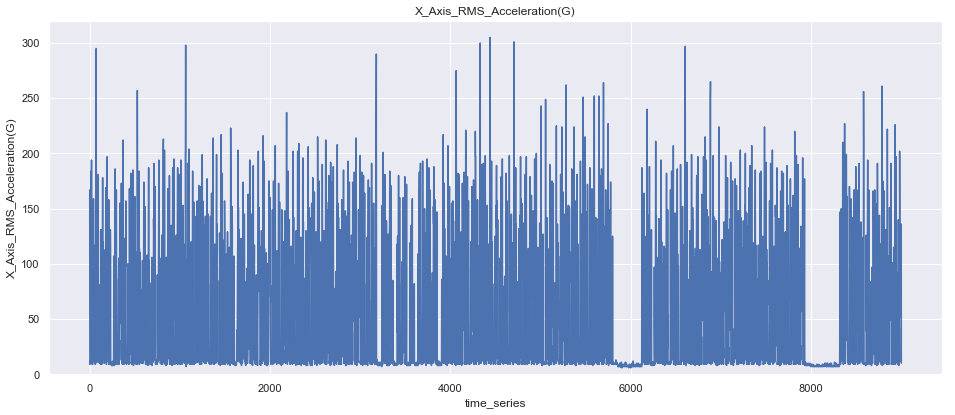

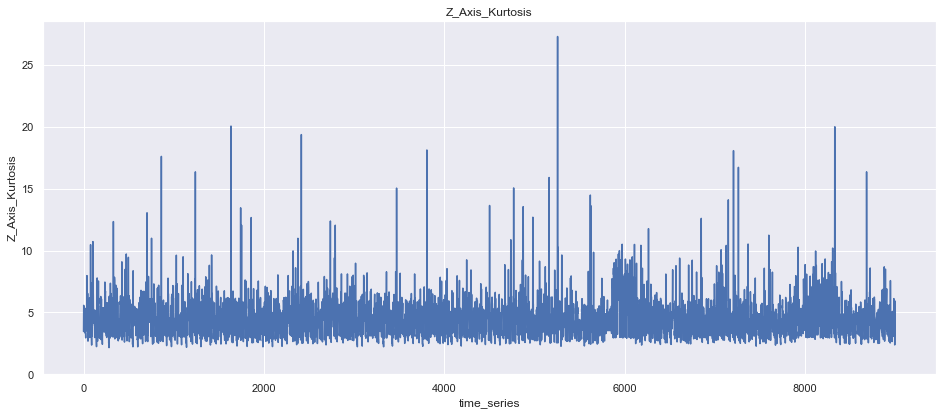

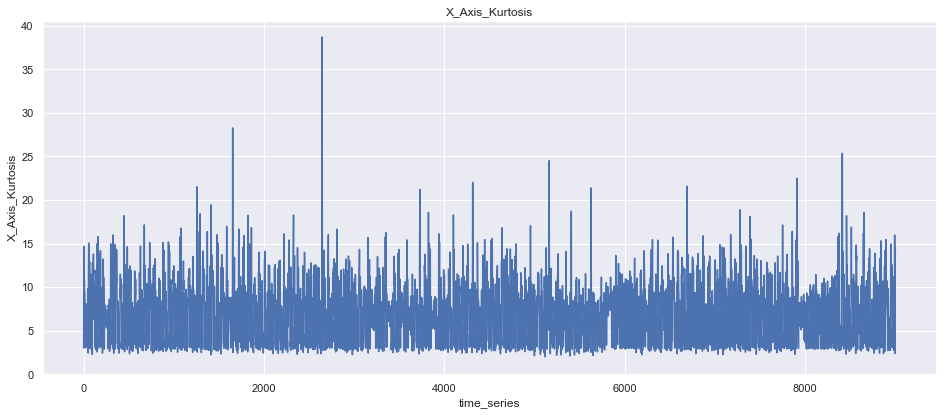

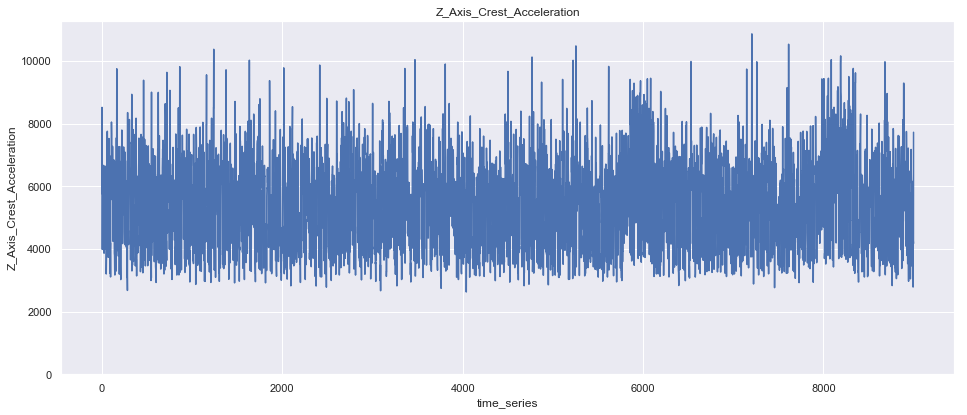

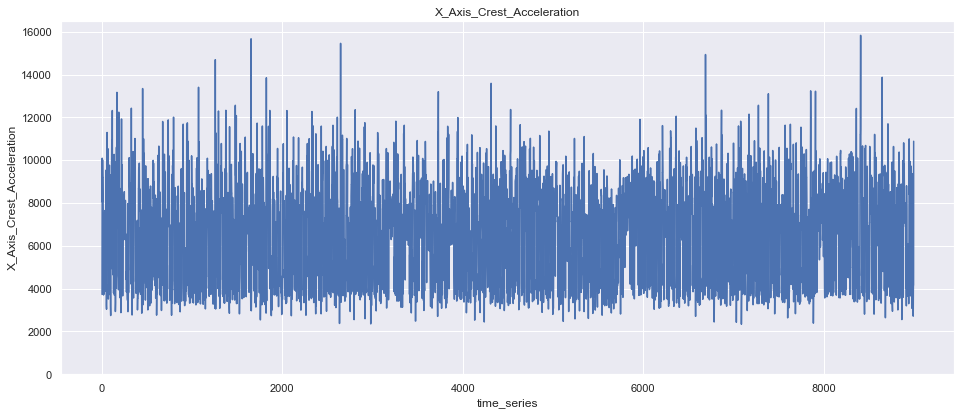

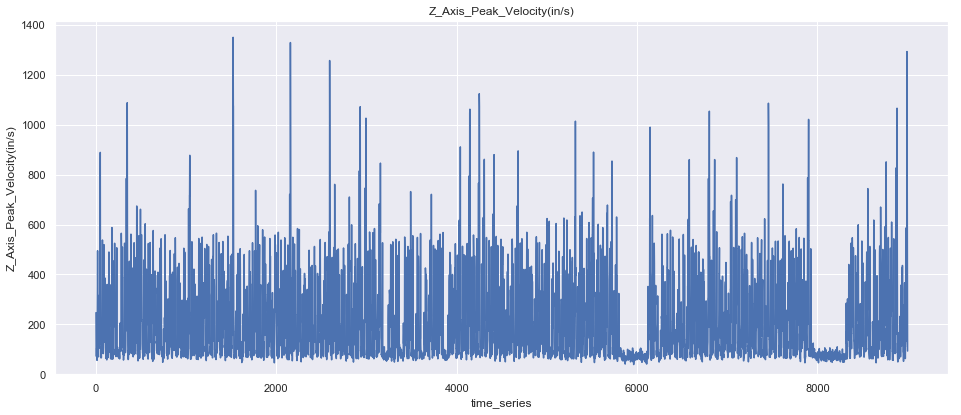

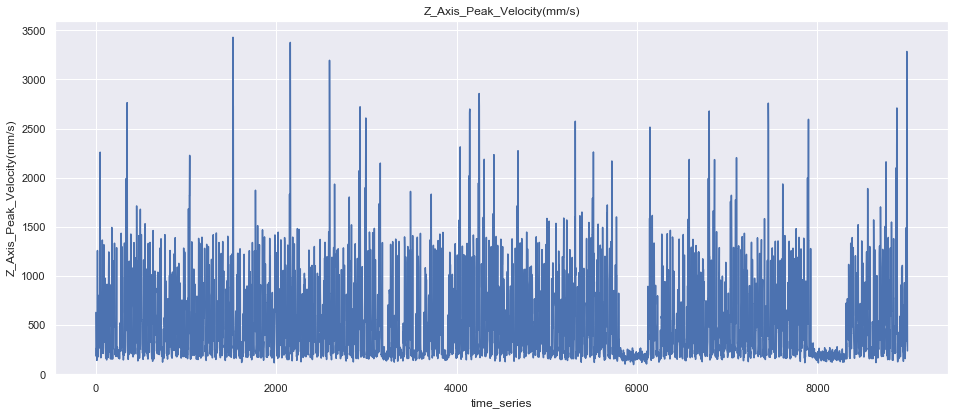

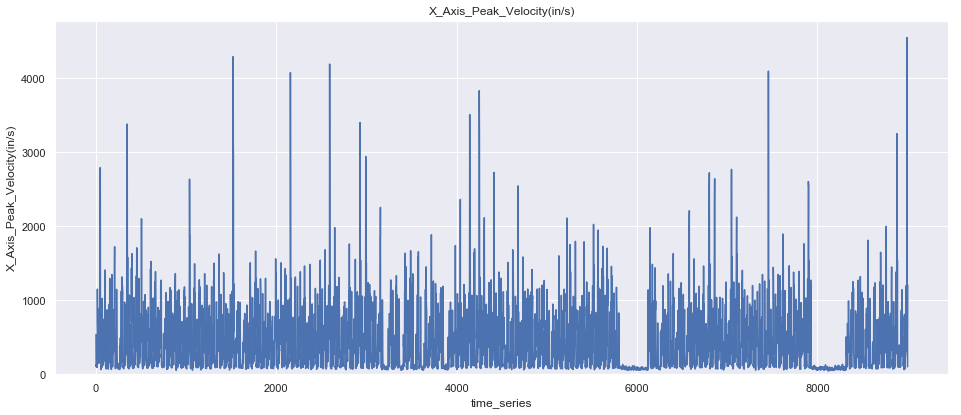

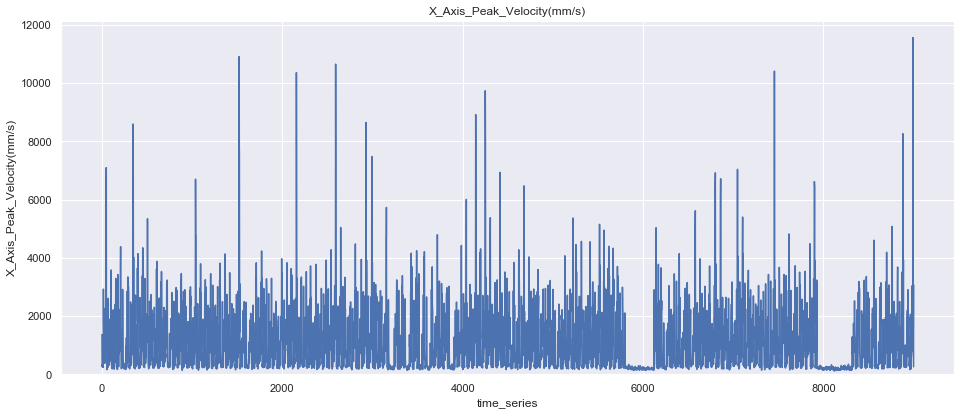

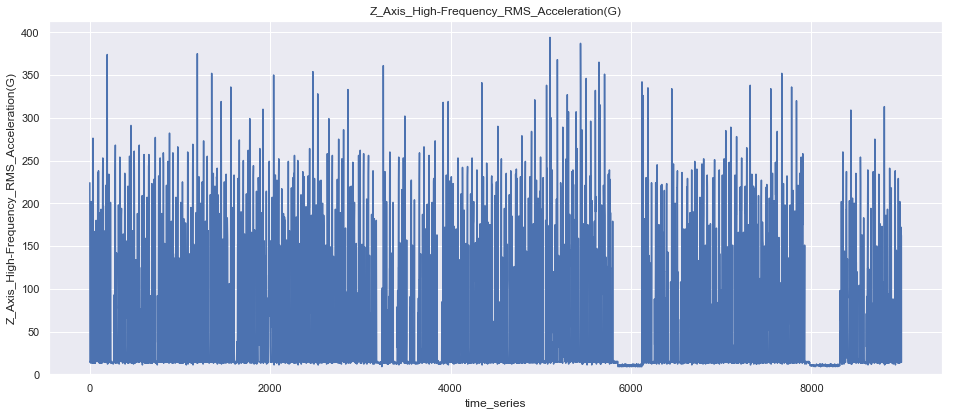

In [18]:
sns.set(style="darkgrid")
palette = sns.color_palette("mako_r", 3)

for i in range(3,len(col_name)):
    f, ax = plt.subplots(figsize=(16, 6.5))
    g = sns.lineplot(x="time_series", y=col_name[i],
#                       hue="node",
                      palette=palette,
                      data=df[0:9000],  
                      ax = ax)
    g.set(ylim=(0, None))
    plt.title(col_name[i])

[(0, 3)]

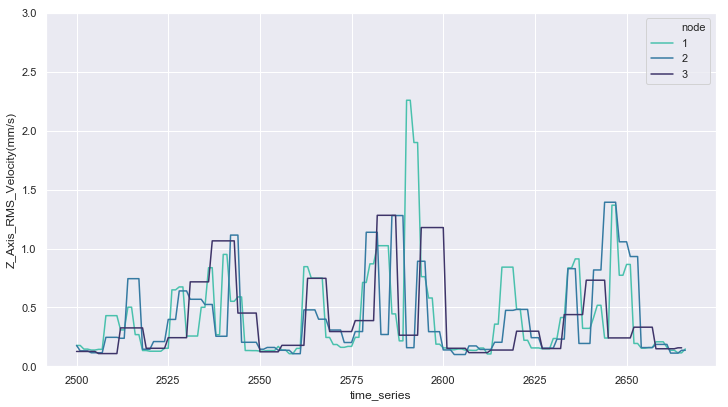

In [12]:
# 4시간 정도
sns.set(style="darkgrid")
palette = sns.color_palette("mako_r", 3)
f, ax = plt.subplots(figsize=(12, 6.5))

# Plot the responses for different events and regions
g1 = sns.lineplot(x="time_series", y="Z_Axis_RMS_Velocity(mm/s)",
                  hue="node",
                  palette=palette,
                  data=df[7500:8000],       
                  ax = ax)
g1.set(ylim=(0, 3))

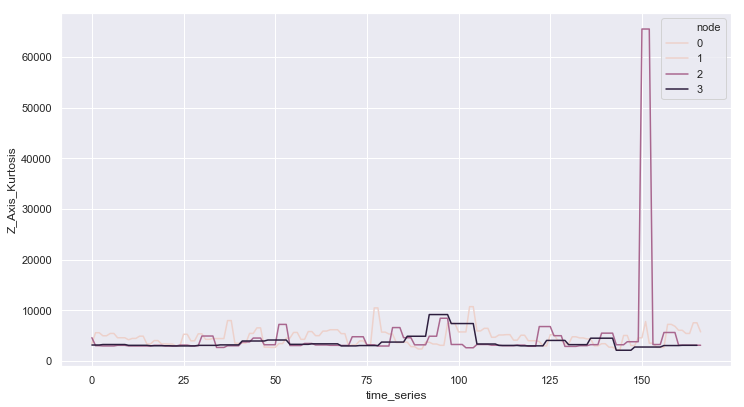

In [13]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(12, 6.5))

# Plot the responses for different events and regions
g1 = sns.lineplot(x="time_series", y="Z_Axis_Kurtosis",
             hue="node",
             data=df[0:500],
             ax = ax)

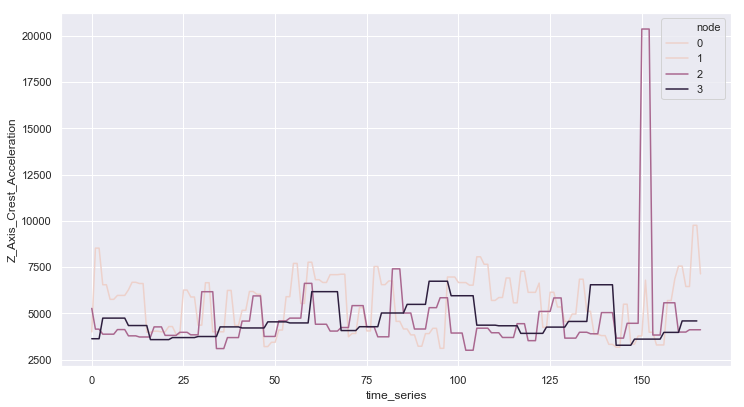

In [250]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(12, 6.5))

# Plot the responses for different events and regions
g1 = sns.lineplot(x="time_series", y="Z_Axis_Crest_Acceleration",
             hue="node",
             data=df[0:500],
             ax = ax)

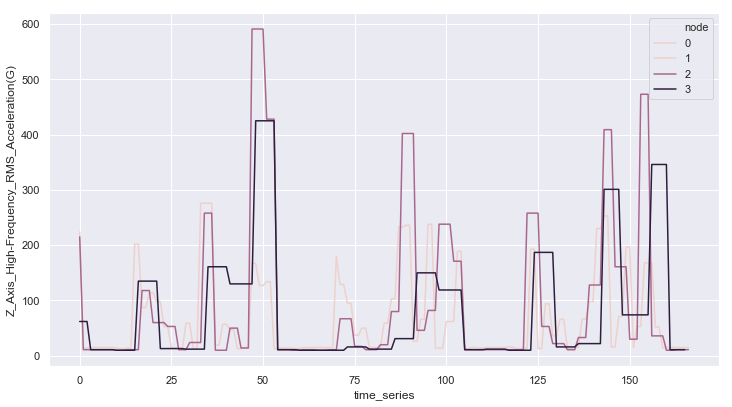

In [249]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(12, 6.5))

# Plot the responses for different events and regions
g1 = sns.lineplot(x="time_series", y="Z_Axis_High-Frequency_RMS_Acceleration(G)",
             hue="node",
             data=df[0:500],
             ax = ax)

In [232]:
col_name

['date',
 'time',
 'Z_Axis_RMS_Velocity(in/s)',
 'Z_Axis_RMS_Velocity(mm/s)',
 'Temperature(F)',
 'Temperature(C)',
 'X_Axis_RMS_Velocity(in/s)',
 'X_Axis_RMS_Velocity(mm/s)',
 'Z_Axis_Peak_Acceleration(G)',
 'X_Axis_Peak_Acceleration(G)',
 'Z_Axis_Peak_Frequency(Hz)',
 'X_Axis_Peak_Frequency(Hz)',
 'Z_Axis_RMS_Acceleration(G)',
 'X_Axis_RMS_Acceleration(G)',
 'Z_Axis_Kurtosis',
 'X_Axis_Kurtosis',
 'Z_Axis_Crest_Acceleration',
 'X_Axis_Crest_Acceleration',
 'Z_Axis_Peak_Velocity(in/s)',
 'Z_Axis_Peak_Velocity(mm/s)',
 'X_Axis_Peak_Velocity(in/s)',
 'X_Axis_Peak_Velocity(mm/s)',
 'Z_Axis_High-Frequency_RMS_Acceleration(G)']

In [ ]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(12, 6.5))

# Plot the responses for different events and regions
g1 = sns.lineplot(x="time_series", y="Z_Axis_RMS_Velocity(mm/s)",
             hue="node",
             data=df[0:500],
             ax = ax)

In [189]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


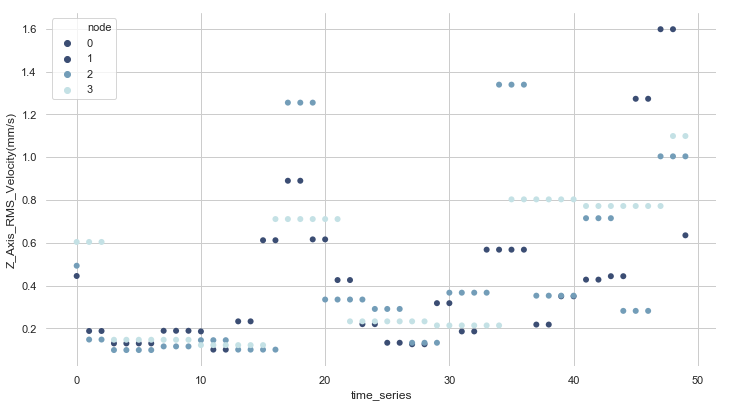

In [214]:
sns.set(style="whitegrid")

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(12, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = [1,2,3]
sns.scatterplot(x="time_series", y="Z_Axis_RMS_Velocity(mm/s)",
                hue="node", palette="ch:r=-.2,d=.3_r",
                hue_order="node",
                sizes=(1, 8), linewidth=0,
                data=result[0:150], ax=ax)


In [163]:
type(np.array(result["Z_Axis_RMS_Velocity(mm/s)"])[0][0])

str

In [151]:
type(fmri["signal"][0])

numpy.float64

In [178]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


C:\Users\dwku\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


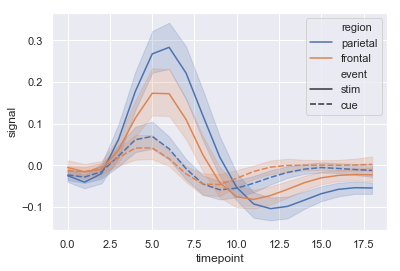

In [144]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


In [51]:

g1 = sns.lmplot(data=Zrms_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                scatter_kws={'linewidths':.2,'edgecolor':'k'}, size=4, aspect=2, palette =sns.color_palette("Set2"),
                legend_out=False)
g1.set_ylabels("RMS Vibration (mm/s)")
g1.despine(left=True)
axes = g1.axes
axes[0,0].set_ylim(0,10)
g1.fig.suptitle(file_list[0][0:8] + " ["+  History_MachineName_array[0] + "] Z-Axis Vibration")

g2 = sns.lmplot(data=Xrms_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                scatter_kws={'linewidths':.2,'edgecolor':'k'}, size=4, aspect=2, palette =sns.color_palette("Set2"),
                legend_out=False)
g2.set_ylabels("RMS Vibration (mm/s)")
g2.despine(left=True)
axes = g2.axes
axes[0,0].set_ylim(0,10)
g2.fig.suptitle(file_list[0][0:8] + " ["+  History_MachineName_array[0] + "] X-Axis Vibration")

g3 = sns.lmplot(data=Temp_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                scatter_kws={'linewidths':.2,'edgecolor':'c'}, size=4, aspect=2, palette =sns.color_palette("Set2"),
                legend_out=False)
g3.set_ylabels("Temperature (°C)")
g3.despine(left=True)
axes = g3.axes
axes[0,0].set_ylim(0,100)
g3.fig.suptitle(file_list[0][0:8] + " ["+  History_MachineName_array[0] + "] Surface Tempeature")


saving_dir = "C:/Users/dwku/Desktop/plot"
g1.savefig(saving_dir)

NameError: name 'Zrms_df' is not defined